# EDA

In [13]:
import pandas as pd
import numpy as np

# Graph visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Map visualizations
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap

## Restaurant

In [14]:
# Load data

restaurants = pd.read_csv('../data/yelp_restaurants.csv')
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,VBVqHnViRLSYAqP7v8iNNQ,JalapeÃ±o Inferno,20825 N Pima Rd,Scottsdale,AZ,85255,33.674880,-111.888635,3.5,247,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",Mexican
1,UZ34XAw1GJ3chCOuKL69Mg,Garcia's,1706 E Warner Rd,Tempe,AZ,85284,33.334835,-111.912521,3.0,119,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",Mexican
2,K4rLi2Mqz931v07nMSih5w,Chipotle Mexican Grill,"7014 E Camelback Rd, Ste 580",Scottsdale,AZ,85251,33.503687,-111.929381,1.5,28,"{'GoodForMeal': ""{'dessert': False, 'latenight...",Mexican
3,uE6bl1eTHJ4CLkq6NM3KUg,Fat Bastard Burrito,30 Eglinton Ave W,Mississauga,ON,L5R 3E7,43.605703,-79.652542,2.0,6,"{'GoodForMeal': ""{'dessert': False, 'latenight...",Mexican
4,ZsKWULhwwB61RHzCrb1i9A,Blue Burrito Grille,5757 Wayne Newton Blvd,Las Vegas,NV,89119,36.080542,-115.146459,2.5,31,"{'RestaurantsDelivery': 'False', 'GoodForKids'...",Mexican


In [15]:
# Dimensions of the data set

print(f'The dataset has {restaurants.shape[0]} rows and {restaurants.shape[1]} columns')

The dataset has 24176 rows and 12 columns


In [16]:
# Description of datatypes

restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24176 entries, 0 to 24175
Data columns (total 12 columns):
business_id     24176 non-null object
name            24176 non-null object
address         24067 non-null object
city            24176 non-null object
state           24176 non-null object
postal_code     24152 non-null object
latitude        24176 non-null float64
longitude       24176 non-null float64
stars           24176 non-null float64
review_count    24176 non-null int64
attributes      23735 non-null object
categories      24176 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 2.2+ MB


In [17]:
# Percentage of null values

restaurants.isnull().mean().round(4)

business_id     0.0000
name            0.0000
address         0.0045
city            0.0000
state           0.0000
postal_code     0.0010
latitude        0.0000
longitude       0.0000
stars           0.0000
review_count    0.0000
attributes      0.0182
categories      0.0000
dtype: float64

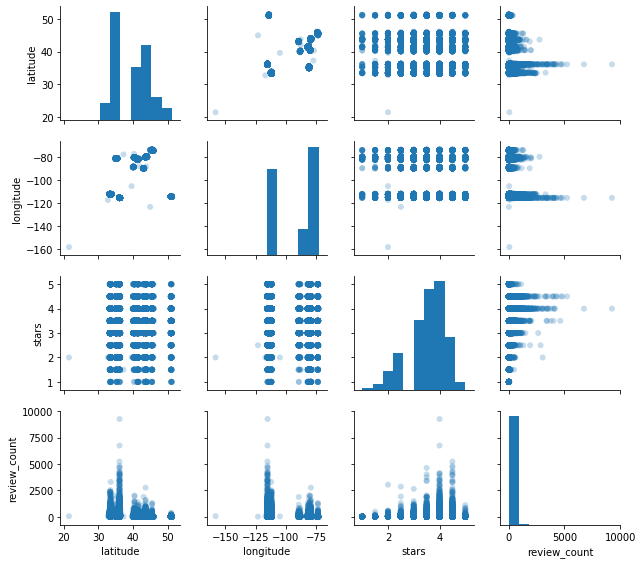

In [18]:
# Distribution of variables

sns.pairplot(restaurants, plot_kws=dict(alpha=.25, edgecolor='none'), height=2, aspect=1.1)

Text(0.5, 1, 'Correlation between numerical variables')

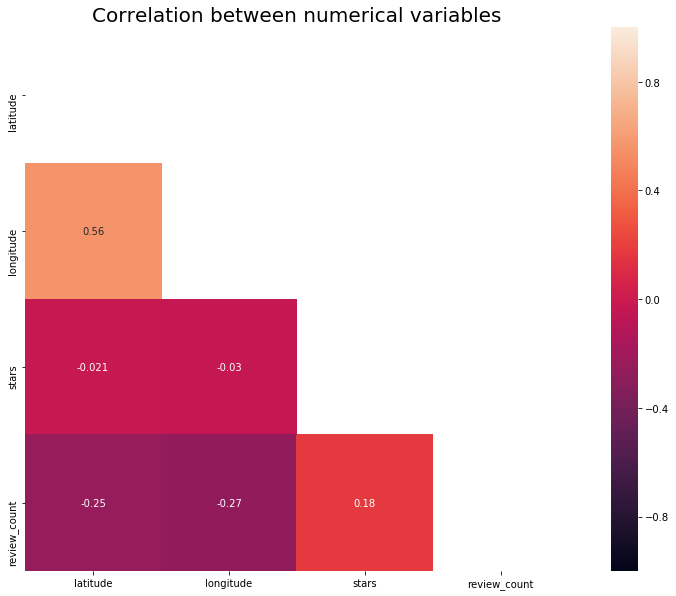

In [19]:
# Correlation between variables using heatmap

# Mask the upper triangle
mask = np.zeros_like(restaurants.corr())
mask[np.triu_indices_from(mask)] = True

# Set dimensions
f, ax = plt.subplots(figsize=(15, 10))

# Create a diverging palette
cmap = sns.diverging_palette(255,10, as_cmap=True)
#Plot the heatmap
ax = sns.heatmap(restaurants.corr(), mask=mask, vmax=1, vmin=-1, square=True, annot=True, ax=ax)
ax.set_title('Correlation between numerical variables', size=20)

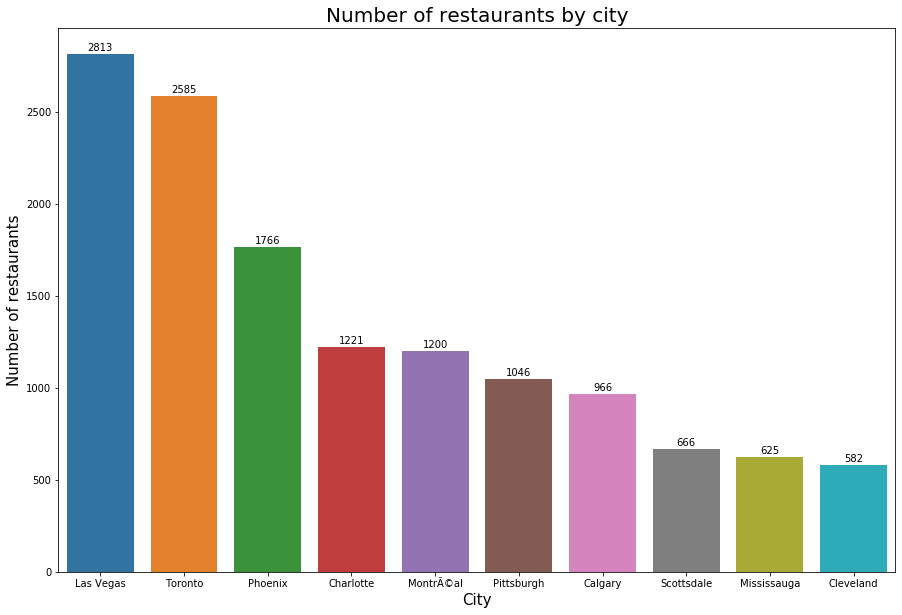

In [20]:
# Number of restaurants in the top 10 cities

x= restaurants['city'].value_counts().head(10)

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x.index, y=x.values, data=restaurants)
ax.set_title('Number of restaurants by city', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('City', size=15)

# adding the text labels
rects = ax.patches
labels = restaurants['city'].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

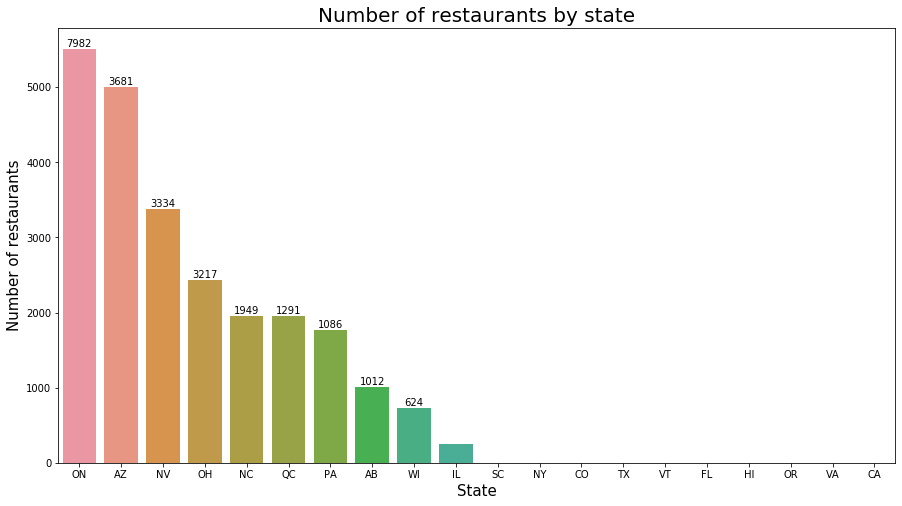

In [21]:
# Number of restaurants in each state

x= restaurants['state'].value_counts().head(10)

plt.figure(figsize=(15,8))
ax= sns.barplot(x=x.index, y=x.values, data=restaurants, order=restaurants['state'].value_counts().index)
ax.set_title('Number of restaurants by state', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('State', size=15)

# adding the text labels
rects = ax.patches
labels = restaurants['categories'].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

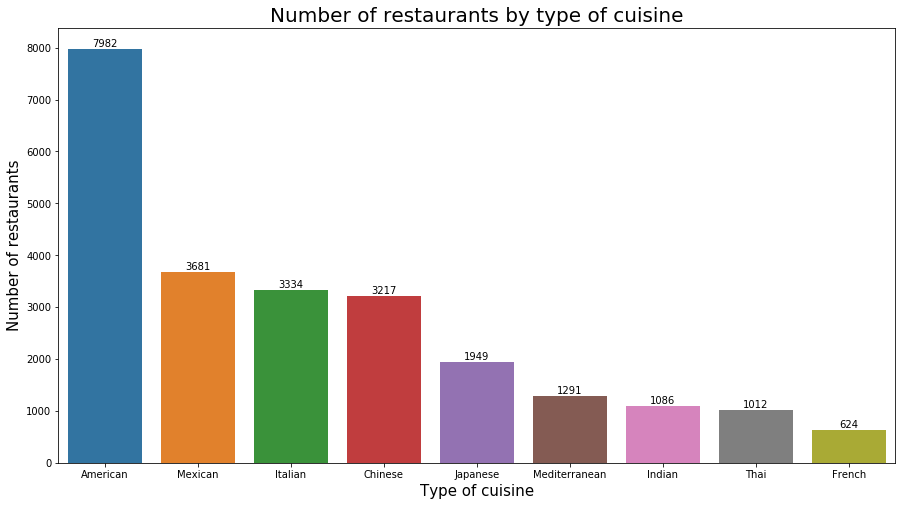

In [22]:
# Number of restaurants by type of cuisine

plt.figure(figsize=(15,8))
ax= sns.countplot(x='categories', data=restaurants, order=restaurants['categories'].value_counts().index)
ax.set_title('Number of restaurants by type of cuisine', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('Type of cuisine', size=15)

# adding the text labels
rects = ax.patches
labels = restaurants['categories'].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [23]:
list_of_states = ['ON', 'AZ', 'NV', 'OH', 'NC', 'QC', 'PA', 'AB', 'WI', 'IL']
popular = restaurants[['name','state','review_count', 'categories']][restaurants['state'].isin(list_of_states)]

for i in range(len(list_of_states)):
    print(f'State: {list_of_states[i]} \n')
    top10 = popular[['name','review_count']][popular['state']==list_of_states[i]].sort_values(by='review_count',ascending=False).head(6)
    print(top10, '\n')

State: ON 

                               name  review_count
23481     Pai Northern Thai Kitchen          2758
13366        KINKA IZAKAYA ORIGINAL          1592
23851                 Khao San Road          1542
2353   Seven Lives Tacos Y Mariscos          1285
13127           Momofuku Noodle Bar          1010
16076           Momofuku Noodle Bar          1010 

State: AZ 

                       name  review_count
10260               Bobby Q          3302
19258       Pizzeria Bianco          2527
10981    Four Peaks Brewing          2400
4008       Joe's Farm Grill          2369
5510   Rehab Burger Therapy          2369
16981      Joe's Farm Grill          2369 

State: NV 

                                name  review_count
20512                   Mon Ami Gabi          9264
6820              Hash House A Go Go          6751
7319                Earl of Sandwich          5232
4497   Yardbird Southern Table & Bar          4828
7066    Gordon Ramsay Hell's Kitchen          4672
9234      

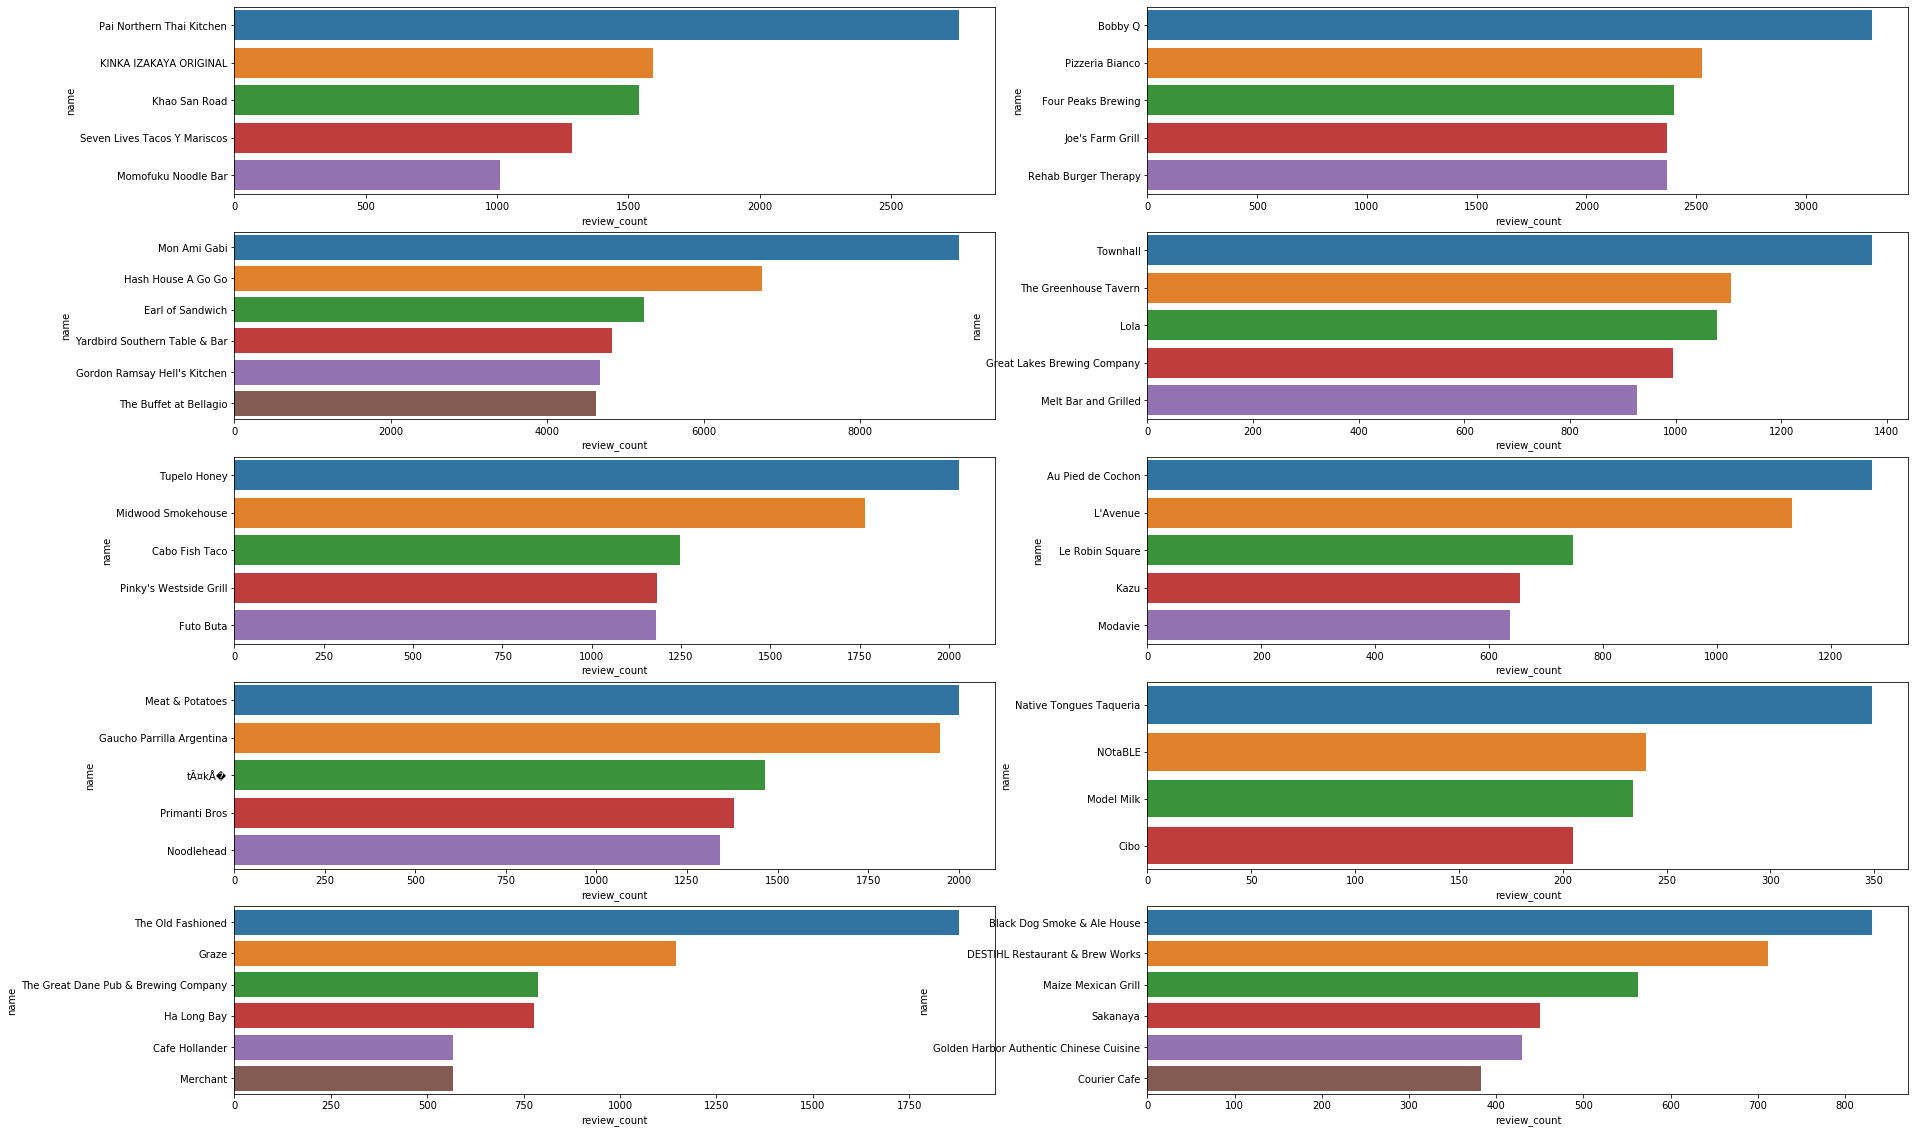

In [25]:
# Most visited restaurants in each state

plt.figure(figsize=(30,20))
for i in range(len(list_of_states)):
    plt.subplot(5,2, i+1)
    ax.set_title(list_of_states[i])
    top10 = popular[['name','review_count']][popular['state']==list_of_states[i]].sort_values(by='review_count',ascending=False).head(6)
    sns.barplot(y='name', x='review_count', data=top10)

In [26]:
# Most visited restaurants in each state
list_cuisines = restaurants['categories'].unique()

for i in range(len(list_cuisines)):
    print(f'Cuisine: {list_cuisines[i]} \n')
    top10 = popular[['name','review_count']][popular['categories']==list_cuisines[i]].sort_values(by='review_count',ascending=False).head(6)
    print(top10, '\n')

Cuisine: Mexican 

                                name  review_count
1341                     Nacho Daddy          4276
1921                  Tacos El Gordo          4016
1251               El Dorado Cantina          3928
291                       Mesa Grill          3533
3417            The Mission Old Town          2190
3031  La Santisima Gourmet Taco Shop          2152 

Cuisine: American 

                               name  review_count
6820             Hash House A Go Go          6751
7319               Earl of Sandwich          5232
4497  Yardbird Southern Table & Bar          4828
7066   Gordon Ramsay Hell's Kitchen          4672
9234         The Buffet at Bellagio          4628
6517                    Nacho Daddy          4276 

Cuisine: Japanese 

                              name  review_count
11848     Gangnam Asian BBQ Dining          3512
12040  Monta Japanese Noodle House          2841
12861       SUSHISAMBA - Las Vegas          2636
11695                       Sakana

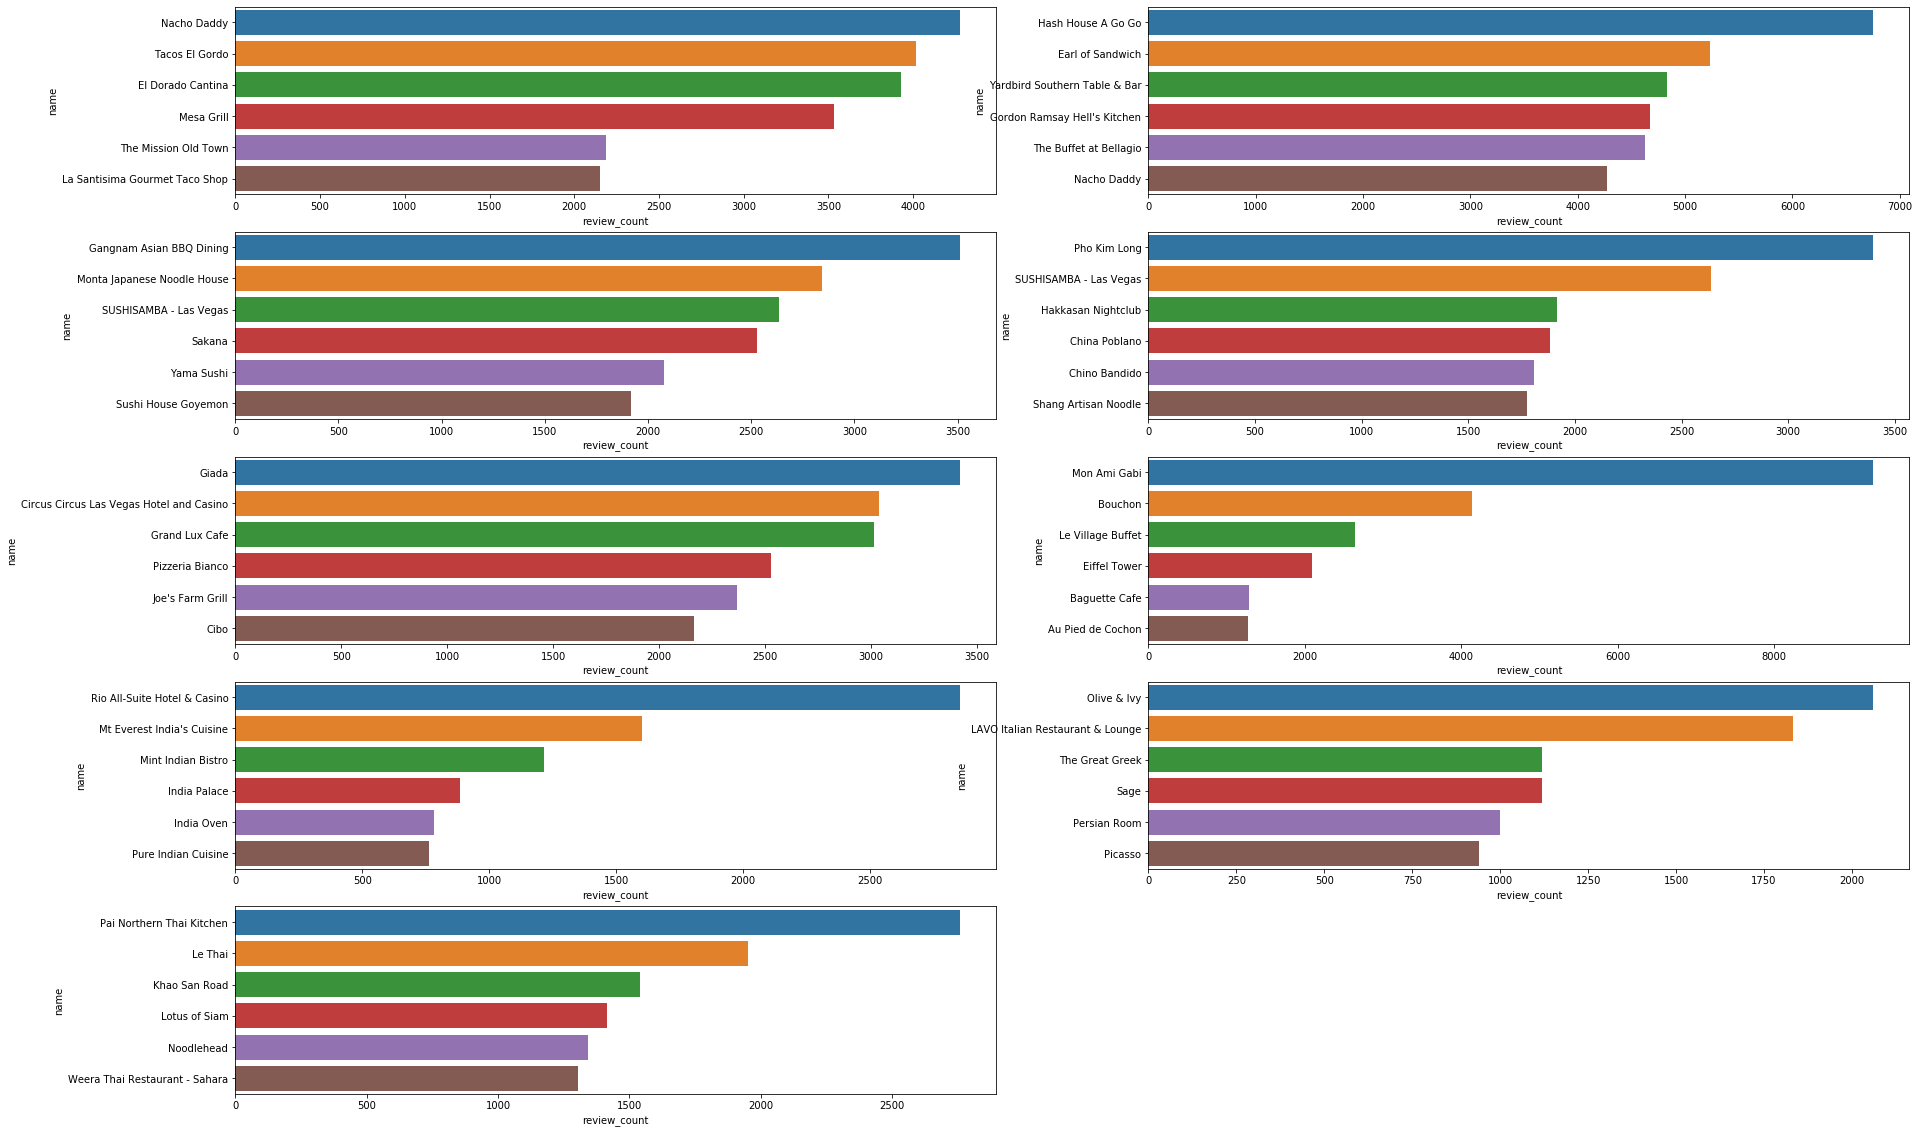

In [27]:
plt.figure(figsize=(30,20))
for i in range(len(list_cuisines)):
    plt.subplot(5,2, i+1)
    top10 = popular[['name','review_count']][popular['categories']==list_cuisines[i]].sort_values(by='review_count',ascending=False).head(6)
    sns.barplot(y='name', x='review_count', data=top10,)
    ax.set_title(list_cuisines[i], size=10)

Text(0.5, 1.0, 'Distribution of restaurant ratings')

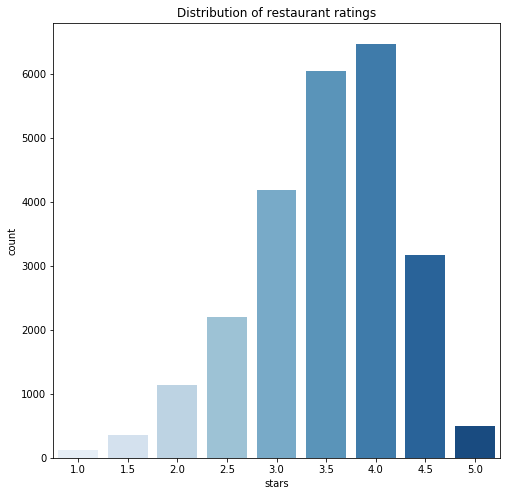

In [28]:
# Star distribution

plt.figure(figsize=(8,8))
sns.countplot(x='stars', data=restaurants, palette='Blues')
plt.title('Distribution of restaurant ratings')

Text(0.5, 22.200000000000003, 'State')

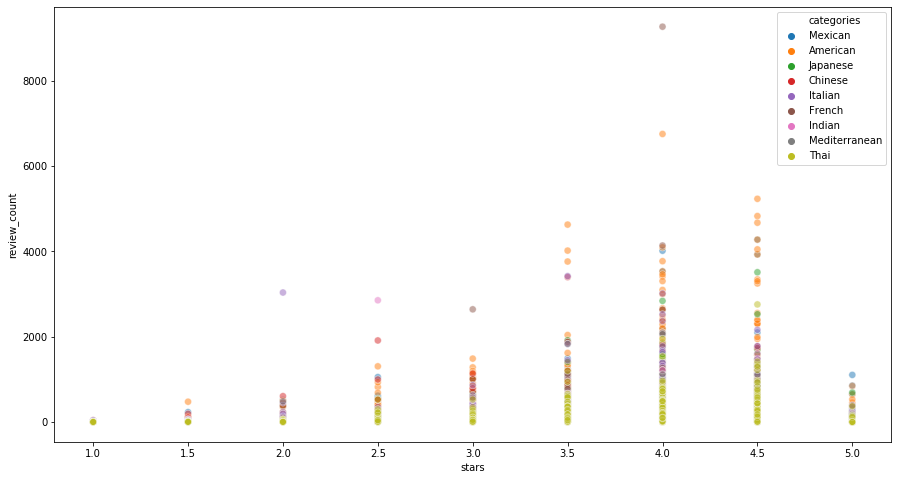

In [29]:
# Relation between stars and review_count

plt.figure(figsize=(15,8))
sns.scatterplot(y='review_count', x='stars', data=restaurants, hue='categories', alpha=0.5, s=50)
ax.set_title('Stars and number of reviews', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('State', size=15)

Text(0.5, 22.200000000000003, 'State')

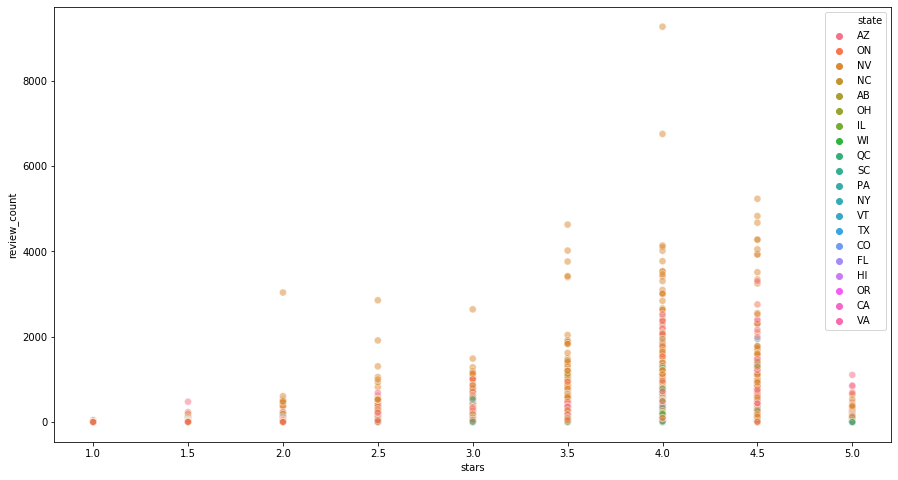

In [30]:
# Distribution of star in each state

plt.figure(figsize=(15,8))
sns.scatterplot(y='review_count', x='stars', data=restaurants, hue='state', alpha=0.5, s=50)
ax.set_title('Stars and number of reviews', size=20)
ax.set_ylabel('Number of restaurants', size=15)
ax.set_xlabel('State', size=15)

## Reviews

In [43]:
reviews = pd.read_csv('../data/yelp_reviews_restaurant.csv')

In [45]:
# For exploratory analysis we only take the following columns in the original dataset
# (user_id, review_stars, useful, funny, cool, text, date) 
# and the city, categories and name from business

reviews = reviews[['user_id', 'review_stars', 'text', 'date', 'name', 'city', 'categories']]
reviews.head()

,user_id,review_stars,text,date,name,city,categories
0,V34qejxNsCbcgD8C0HVk-Q,5,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,Deagan's Kitchen & Bar,Lakewood,American
1,zFCuveEe6M-ijY1iy23IJg,5,"We walked into Melt. ""Did you want to put your...",2011-08-25 04:24:23,Deagan's Kitchen & Bar,Lakewood,American
2,4V985R3RG-rv0B7WCPQzeQ,1,I commented on how slow the service was last A...,2015-03-04 20:37:43,Deagan's Kitchen & Bar,Lakewood,American
3,nFGcoL6wuPQzxsNJVSfGrA,4,We walked in off the streets on a September ni...,2014-09-10 01:38:55,Deagan's Kitchen & Bar,Lakewood,American
4,CJqgUQeWhdgbDyLAFy7xvQ,4,Brunch on Saturday was excellent. The Bloody M...,2018-01-21 18:50:29,Deagan's Kitchen & Bar,Lakewood,American


In [46]:
print(f'The dataset has {reviews.shape[0]} rows and {reviews.shape[1]} columns')

The dataset has 3140427 rows and 7 columns


In [47]:
# Description of datatypes

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140427 entries, 0 to 3140426
Data columns (total 7 columns):
user_id         object
review_stars    int64
text            object
date            object
name            object
city            object
categories      object
dtypes: int64(1), object(6)
memory usage: 167.7+ MB


In [48]:
# Percentage of null values

reviews.isnull().mean().round(4)

user_id         0.0
review_stars    0.0
text            0.0
date            0.0
name            0.0
city            0.0
categories      0.0
dtype: float64

In [49]:
n_ratings = reviews.shape[0]
n_restaurants = reviews['name'].nunique()
n_users = reviews['user_id'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of unique restaurants: {n_restaurants}')
print(f'Number of unique users: {n_users}')
print(f'Average number of ratings per user: {round(n_ratings/n_users, 2)}')
print(f'Average number of ratings per restaurant: {round(n_ratings/n_restaurants, 2)}')

Number of ratings: 3140427
Number of unique restaurants: 16174
Number of unique users: 1015461
Average number of ratings per user: 3.09
Average number of ratings per restaurant: 194.17


In [50]:
n_ratings_per_user = reviews.groupby('user_id')['review_stars'].count()
n_ratings_per_restaurant = reviews.groupby('name')['review_stars'].count()

Mean rating per user: 3.75.
Mean rating per restaurant: 3.69.


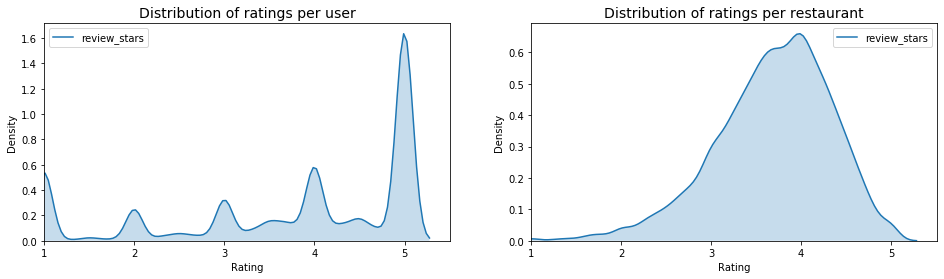

In [40]:
plt.figure(figsize=(16,4))

# Mean rating by restaurant
plt.subplot(1,2,1)
mean_rating_user = reviews.groupby('user_id')['review_stars'].mean()
sns.kdeplot(mean_rating_user, shade=True)
plt.xlim(1)
plt.title('Distribution of ratings per user', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')

print(f'Mean rating per user: {round(mean_rating_user.mean(), 2)}.')

# Mean rating by restaurant
plt.subplot(1,2,2)
mean_rating_restaurant = reviews.groupby('name')['review_stars'].mean()
sns.kdeplot(mean_rating_restaurant, shade=True)
plt.xlim(1)
plt.title('Distribution of ratings per restaurant', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')

print(f'Mean rating per restaurant: {round(mean_rating_restaurant.mean(), 2)}.')


Text(0, 0.5, 'Density')

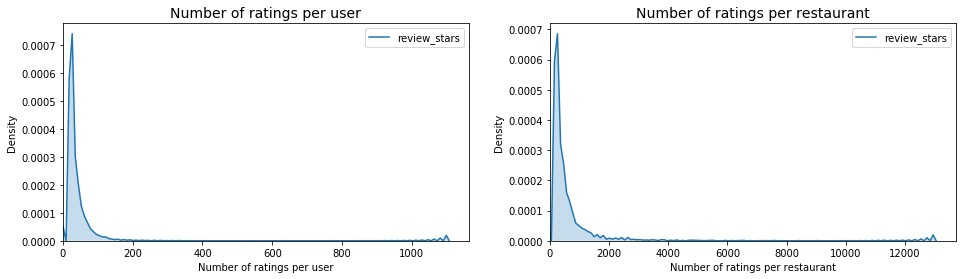

In [41]:
# Distribution of number of reviews per restaurant and user

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title('Number of ratings per user', fontsize=14)
plt.xlabel('Number of ratings per user')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_restaurant, shade=True)
plt.xlim(0)
plt.title('Number of ratings per restaurant', fontsize=14)
plt.xlabel('Number of ratings per restaurant')
plt.ylabel('Density')

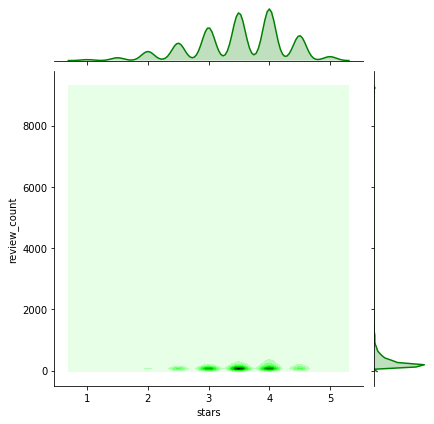

In [69]:
sns.jointplot(y='review_count', x='stars', data=restaurants,
                  kind="kde", color="g")

In [52]:
# Top 10 users in Yelp

top_users = reviews.groupby('user_id').agg({'review_stars':['count','mean'], 'date':['min', 'max']})

In [53]:
print('Top 10 users in Yelp')
top_users.sort_values(('review_stars','count'), ascending=False).head(10)

Top 10 users in Yelp


review_stars                           date  \
                              count      mean                  min   
user_id                                                              
CxDOIDnH8gp9KXzpBHJYXw         1107  3.199639  2009-11-09 21:41:13   
ELcQDlf69kb-ihJfxZyL0A          951  3.152471  2011-05-24 22:54:40   
bLbSNkLggFnqwNNzzq-Ijw          845  3.443787  2012-05-20 19:50:41   
U4INQZOPSUaj8hMjLlZ3KA          768  4.174479  2008-06-01 02:19:17   
d_TBs6J3twMy9GChqUEXkg          684  3.476608  2010-12-27 21:00:05   
PKEzKWv_FktMm2mGPjwd0Q          644  3.712733  2009-07-27 21:18:15   
cMEtAiW60I5wE_vLfTxoJQ          616  4.089286  2009-06-12 01:46:33   
DK57YibC5ShBmqQl97CKog          586  3.738908  2006-02-12 09:00:17   
V-BbqKqO8anwplGRx9Q5aQ          568  3.459507  2011-03-09 18:11:14   
MMf0LhEk5tGa1LvN7zcDnA          458  3.294760  2010-07-18 03:49:08   

                                             
                                        max  
user_id                                      
CxDOIDnH8gp9KXzpBHJYXw  2019-12-12 14:40:20  
ELcQDlf69kb-ihJfxZyL0A  2019-12-11 21:47:57  
bLbSNkLggFnqwNNzzq-Ijw  2019-11-19 17:37:28  
U4INQZOPSUaj8hMjLlZ3KA  2019-12-03 12:24:36  
d_TBs6J3twMy9GChqUEXkg  2019-11-20 13:39:24  
PKEzKWv_FktMm2mGPjwd0Q  2019-11-29 19:22:46  
cMEtAiW60I5wE_vLfTxoJQ  2018-07-31 14:50:26  
DK57YibC5ShBmqQl97CKog  2019-12-10 17:11:09  
V-BbqKqO8anwplGRx9Q5aQ  2019-12-08 22:08:39  
MMf0LhEk5tGa1LvN7zcDnA  2019-12-11 13:59:37

In [54]:
# Calculate the bayesian average to know the best restaurants

restaurant_stats = reviews.groupby('name')['review_stars'].agg(['count', 'mean'])
restaurant_stats.head()

,count,mean
name,,
China,10,3.200000
&Company Resto Bar,58,2.672414
1 Pot,36,3.277778
100th Bomb Group,214,3.009346
107 State,18,3.333333


In [55]:
C = restaurant_stats['count'].mean()
m = restaurant_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum())/(C + ratings.count())
    return bayesian_avg

bayesian_avg_ratings = reviews.groupby('name')['review_stars'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['name', 'bayesian_avg']
restaurant_stats = restaurant_stats.merge(bayesian_avg_ratings, on='name')
restaurant_stats.head()

,name,count,mean,bayesian_avg
0,China,10,3.200000,3.668070
1,&Company Resto Bar,58,2.672414,3.457623
2,1 Pot,36,3.277778,3.627361
3,100th Bomb Group,214,3.009346,3.334170
4,107 State,18,3.333333,3.661733


In [56]:
# 10 best restaurants based on bayesian_avg

restaurant_stats.sort_values('bayesian_avg', ascending=False).head(10)

,name,count,mean,bayesian_avg
2939,Cocina Madrigal,1141,4.864154,4.693721
9147,Mr Mamas,3434,4.656377,4.604777
6915,Kodo Sushi Sake,720,4.834722,4.592050
12707,Soho Japanese Restaurant,1801,4.679622,4.583526
906,Bajamar Seafood & Tacos,672,4.830357,4.575215
15808,Worth Takeaway,868,4.761521,4.566043
5289,Green Corner Restaurant,1142,4.707531,4.559984
14649,The Tasty Bowl Subs N Such,640,4.820312,4.557721
889,Baguette Cafe,1362,4.675477,4.552789
6562,Juan's Flaming Fajitas & Cantina,3116,4.605905,4.552308


In [57]:
# 10 worst restaurants based on bayesian_avg

restaurant_stats.sort_values('bayesian_avg', ascending=True).head(10)

,name,count,mean,bayesian_avg
10675,Pizza Hut,4775,2.048796,2.113009
10827,Popeyes Louisiana Kitchen,3419,2.126060,2.210221
13834,Tequileria,1018,1.950884,2.229805
8620,McFadden's Restaurant & Saloon,487,1.694045,2.263610
6312,Jack in the Box,4291,2.219762,2.283504
2864,Circus Circus Las Vegas Hotel and Casino,3110,2.240514,2.325820
8621,McFadden's Restaurant and Saloon,1004,2.067729,2.330974
12045,Sam Woo BBQ Restaurant,617,2.012966,2.414911
12496,Sicily's Pizza,473,1.894292,2.417530
2863,Circus Buffet,426,1.917840,2.473361


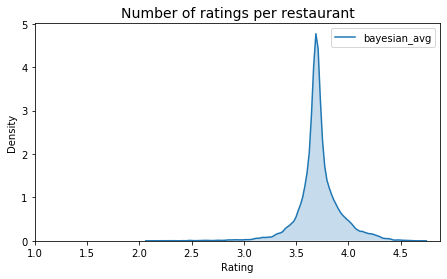

Mean rating per restaurant: 3.69.


In [58]:
plt.figure(figsize=(16,4))

# Mean rating by restaurant
plt.subplot(1,2,2)
#mean_rating_restaurant = reviews.groupby('name')['review_stars'].mean()
sns.kdeplot(restaurant_stats['bayesian_avg'], shade=True)
plt.xlim(1)
plt.title('Number of ratings per restaurant', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

print(f'Mean rating per restaurant: {round(mean_rating_restaurant.mean(), 2)}.')

In [59]:
# Location of restaurants in Las Vegas

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Las Vegas']

# Coordinate limits of the map
BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

# Establish a point in the map                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

HeatMap(subset, radius=7, max_zoom=11, 
        gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

m

In [60]:
# Location of restaurants in Toronto

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Toronto']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

HeatMap(subset, radius=7, max_zoom=11, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

m

In [61]:
# Location of restaurants in Phoenix

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Phoenix']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

HeatMap(subset, radius=7, max_zoom=13, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

m

(-115.35134199999999, -114.89648999999999, 35.9208835, 36.381902000000004)


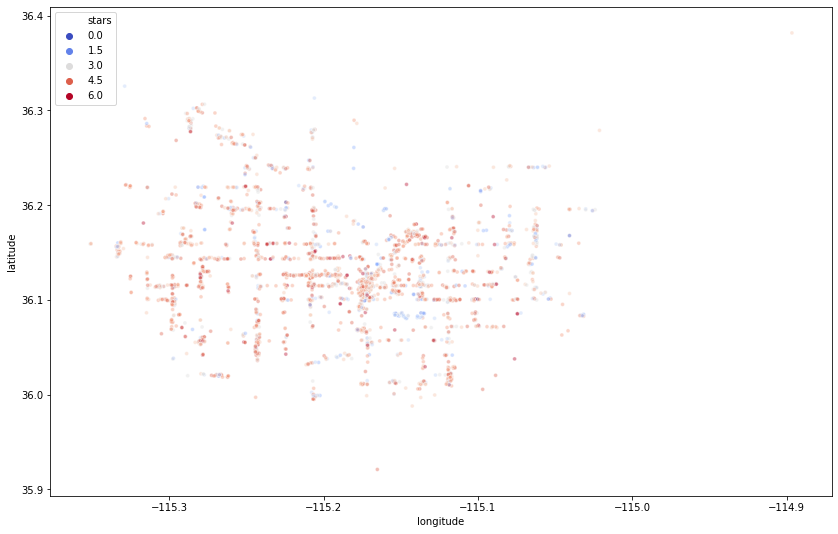

In [62]:
# Map of the 4 cities with most restaurants (color rating)

data = list()
rating_list = list(restaurants['stars'].unique())

subset = restaurants[['latitude', 'longitude', 'stars']][restaurants['city'] == 'Las Vegas']

BBox = ((subset['longitude'].min(), subset['longitude'].max(),
         subset['latitude'].min(), subset['latitude'].max()))

print(BBox)
                
lat = subset['latitude'].mean()
lon = subset['longitude'].mean()
zoom_start = 11

fig, ax = plt.subplots(figsize= (14,9))

sns.scatterplot(subset.longitude, subset.latitude, alpha=0.4, hue=subset.stars, palette='coolwarm', s=15)

### WordClouds

Representation of the most important words in the reviews according 
to positive reviews (4 or 5) or negative reviews (1,2)

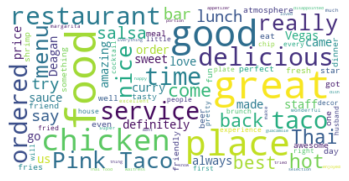

In [88]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Positive Ratings (4, 5)

text = " ".join([review for review in reviews.text[reviews.review_stars >= 4]][0:100])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

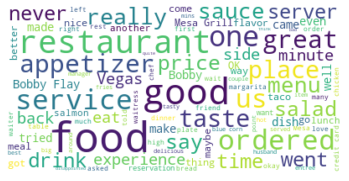

In [89]:
# Negative Ratings (1, 2)

text = " ".join([review for review in reviews.text[reviews.review_stars <= 2]][0:100])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()